In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.datasets import make_swiss_roll
import DiffusionModel as DM
import torch.optim as optim
import seaborn as sns
import torch.nn as nn
from celluloid import Camera
import torch.optim as optim

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


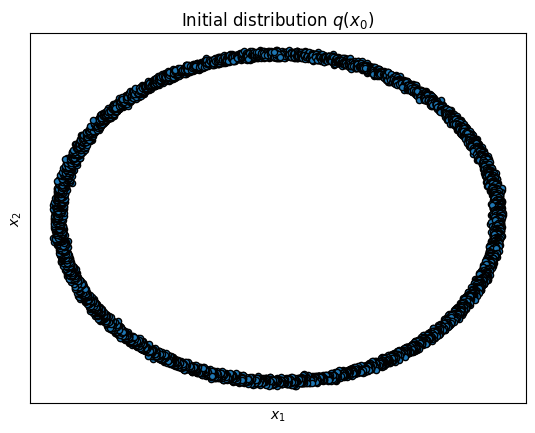

In [6]:
#DISTRIBUCIÓN DE PROBABILIDAD EN CUESTIÓN QUE SE QUIERE APRENDER

n_samples=15000
rho=1.0
x = rho * np.array([
    [np.sin(i/15000 * 2 * np.pi) + np.random.randn() * rho * 0.01,
     np.cos(i/15000 * 2 * np.pi) + np.random.randn() * rho * 0.01] for i in range(n_samples)
     ])

#data = (data - data.mean(axis=0)) / data.std(axis=0)
plt.scatter(x[:,0], x[:,1], c='#1f77b4', marker='o', s=20,  edgecolor='black')
plt.xlabel(r"$x_{1}$")
plt.ylabel(r"$x_{2}$")
plt.title(r"Initial distribution $q(x_0)$")
plt.xticks([])
plt.yticks([])

X = torch.tensor(x, dtype=torch.float32)

In [4]:
diffusion_steps = 50

# Parámetros definidos de acuerdo al paper de Nichol & Dariwal (https://arxiv.org/pdf/2102.09672.pdf)
# Con el objetivo de optimizar el proceso de aprendizaje.
s = 0.008
timesteps = torch.tensor(range(0, diffusion_steps), dtype=torch.float32)
schedule = torch.cos((timesteps / diffusion_steps + s) / (1 + s) * torch.pi / 2)**2

baralphas = schedule / schedule[0]
betas = 1 - baralphas / torch.concatenate([baralphas[0:1], baralphas[0:-1]])
alphas = 1 - betas

In [5]:
def diffuse(Xbatch, t):
    epsilon = torch.randn(size=Xbatch.shape)
    #.repeat to transform baralphas to adequate dimension: a vector of same size as Xbatch:
    diffused = np.sqrt(baralphas[t]).repeat(1,Xbatch.shape[1]) * Xbatch + (np.sqrt(1-baralphas[t])).repeat(1,Xbatch.shape[1]) * epsilon
    return diffused, epsilon

MovieWriter ffmpeg unavailable; using Pillow instead.


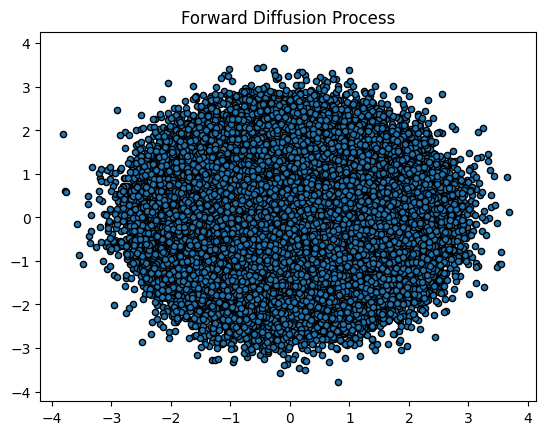

In [6]:
camera = Camera(plt.figure())
for t in range(25):
    diffused, _ = diffuse(X, torch.full([len(X), 1], fill_value=t))
    plt.title(str("Forward Diffusion Process"))
    plt.scatter(diffused[:, 0], diffused[:, 1], c='#1f77b4', marker='o', s=20,  edgecolor='black')
    camera.snap()

anim = camera.animate(blit=True)
anim.save('diffusion.gif')

In [9]:
from IPython.display import HTML

HTML("""
<div align="middle">
  <IMG SRC="diffusion.gif">
</div>""")

MovieWriter ffmpeg unavailable; using Pillow instead.


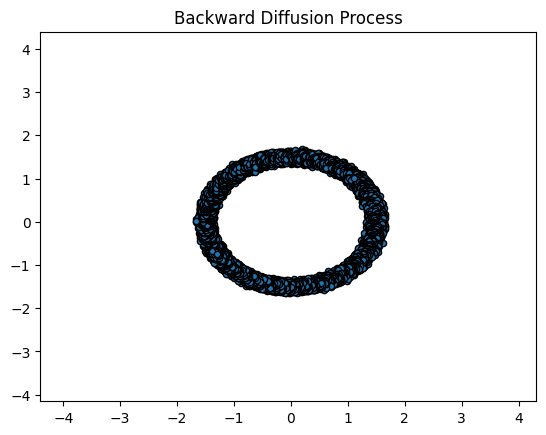

In [17]:
camera = Camera(plt.figure())
for t in range(25, 0, -1):
    diffused, _ = diffuse(X, torch.full([len(X), 1], fill_value=t))
    plt.title(str("Backward Diffusion Process"))
    plt.scatter(diffused[:, 0], diffused[:, 1], c='#1f77b4', marker='o', s=20,  edgecolor='black')
    camera.snap()

anim = camera.animate(blit=True)
anim.save('Bdiffusion.gif')

In [18]:
from IPython.display import HTML

HTML("""
<div align="middle">
  <IMG SRC="Bdiffusion.gif">
</div>""")

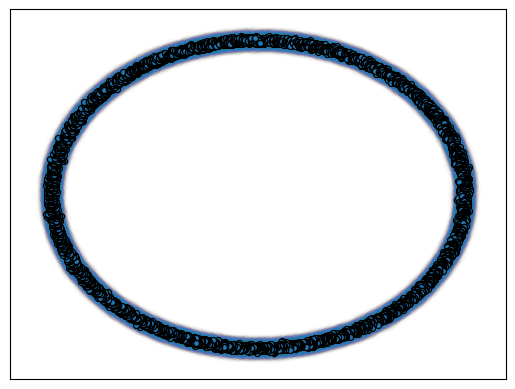

In [7]:
diffused, _ = diffuse(X, torch.full([len(X), 1], fill_value=0))
#plt.title(r"$q(x_0)$")
plt.scatter(diffused[:, 0], diffused[:, 1], c='#1f77b4', marker='o', s=20,  edgecolor='black')
plt.scatter(diffused[:, 0], diffused[:, 1], c='#1f77b4', s=250, alpha=0.002)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xticks([])
plt.yticks([])
plt.show()

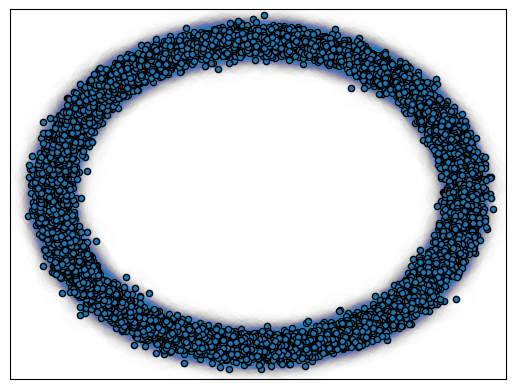

In [8]:
diffused, _ = diffuse(X, torch.full([len(X), 1], fill_value=1))
#plt.title(r"$q(x_1 | x_0)$")
plt.scatter(diffused[:, 0], diffused[:, 1], c='#1f77b4', marker='o', s=20,  edgecolor='black')
plt.scatter(diffused[:, 0], diffused[:, 1], s=750, alpha=0.002)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xticks([])
plt.yticks([])
plt.show()

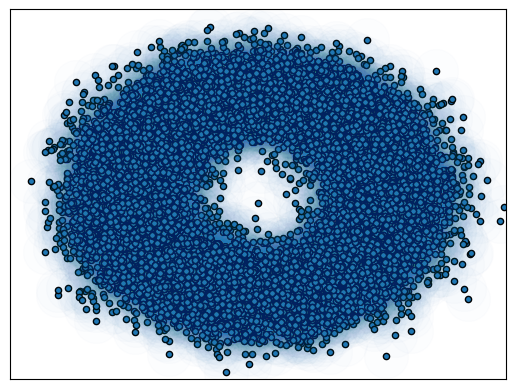

In [9]:
diffused, _ = diffuse(X, torch.full([len(X), 1], fill_value=7))
#plt.title(r"$q(x_t|x_{t-1})$")
plt.scatter(diffused[:, 0], diffused[:, 1], c='#1f77b4', marker='o', s=20,  edgecolor='black')
plt.scatter(diffused[:, 0], diffused[:, 1], s=1000, alpha=0.01)
plt.xlim(-1.8, 1.8)
plt.ylim(-1.8, 1.8)
plt.xticks([])
plt.yticks([])
plt.show()

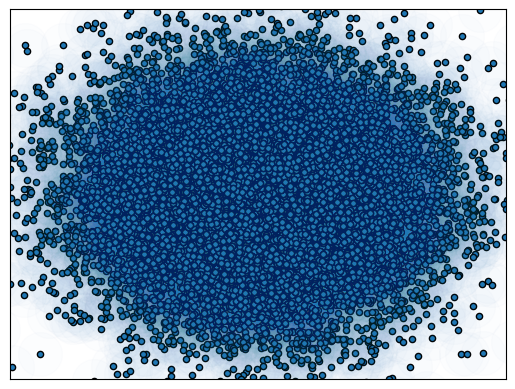

In [10]:
diffused, _ = diffuse(X, torch.full([len(X), 1], fill_value=39))
#plt.title(r"$q(x_T)$")
plt.scatter(diffused[:, 0], diffused[:, 1], c='#1f77b4', marker='o', s=20,  edgecolor='black')
plt.scatter(diffused[:, 0], diffused[:, 1], s=1000, alpha=0.01)
plt.xlim(-2.8, 2.8)
plt.ylim(-2.8, 2.8)
plt.xticks([])
plt.yticks([])
plt.show()